<a href="https://colab.research.google.com/github/Iddhie/MLprojects/blob/main/DiabetesDeepLearning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## A deep-learning model to predict diabetes presence in a given patient with a binary classifier.



In [1]:
# Setup plotting defaults
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')
# Set Matplotlib defaults
plt.rc('figure', autolayout=True)
plt.rc('axes', labelweight='bold', labelsize='large',
       titleweight='bold', titlesize=18, titlepad=10)
plt.rc('animation', html='html5')

<ipython-input-1-261bceb8aaa8>:3: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-whitegrid')


In [2]:
#Import required libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.pipeline import make_pipeline
from sklearn.compose import make_column_transformer
#Import and read the dataset
data = pd.read_csv('/content/drive/MyDrive/diabetes_prediction_dataset.csv')
data


,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,Female,80.0,0,1,never,25.19,6.6,140,0
1,Female,54.0,0,0,No Info,27.32,6.6,80,0
2,Male,28.0,0,0,never,27.32,5.7,158,0
3,Female,36.0,0,0,current,23.45,5.0,155,0
4,Male,76.0,1,1,current,20.14,4.8,155,0
...,...,...,...,...,...,...,...,...,...
99995,Female,80.0,0,0,No Info,27.32,6.2,90,0
99996,Female,2.0,0,0,No Info,17.37,6.5,100,0
99997,Male,66.0,0,0,former,27.83,5.7,155,0
99998,Female,24.0,0,0,never,35.42,4.0,100,0


In [3]:
#Count the number of diabetes positive cases
count_ones = (data['diabetes'] == 1).sum()
print(count_ones)

8500


In [4]:
# Check for missing data
data.isnull().sum(axis=0)
# check for summary of features
data.describe()

,age,hypertension,heart_disease,bmi,HbA1c_level,blood_glucose_level,diabetes
count,100000.000000,100000.00000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000
mean,41.885856,0.07485,0.039420,27.320767,5.527507,138.058060,0.085000
std,22.516840,0.26315,0.194593,6.636783,1.070672,40.708136,0.278883
min,0.080000,0.00000,0.000000,10.010000,3.500000,80.000000,0.000000
25%,24.000000,0.00000,0.000000,23.630000,4.800000,100.000000,0.000000
50%,43.000000,0.00000,0.000000,27.320000,5.800000,140.000000,0.000000
75%,60.000000,0.00000,0.000000,29.580000,6.200000,159.000000,0.000000
max,80.000000,1.00000,1.000000,95.690000,9.000000,300.000000,1.000000


In [6]:
#Encode the non-binary and non-ordinal data into binary type data
data_encoded = pd.get_dummies(data, columns=['gender', 'smoking_history'],drop_first=True)
data_encoded

,age,hypertension,heart_disease,bmi,HbA1c_level,blood_glucose_level,diabetes,gender_Male,gender_Other,smoking_history_current,smoking_history_ever,smoking_history_former,smoking_history_never,smoking_history_not current
0,80.0,0,1,25.19,6.6,140,0,0,0,0,0,0,1,0
1,54.0,0,0,27.32,6.6,80,0,0,0,0,0,0,0,0
2,28.0,0,0,27.32,5.7,158,0,1,0,0,0,0,1,0
3,36.0,0,0,23.45,5.0,155,0,0,0,1,0,0,0,0
4,76.0,1,1,20.14,4.8,155,0,1,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,80.0,0,0,27.32,6.2,90,0,0,0,0,0,0,0,0
99996,2.0,0,0,17.37,6.5,100,0,0,0,0,0,0,0,0
99997,66.0,0,0,27.83,5.7,155,0,1,0,0,0,1,0,0
99998,24.0,0,0,35.42,4.0,100,0,0,0,0,0,0,1,0


In [40]:
!pip install keras-tuner


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 176.1/176.1 kB 5.3 MB/s eta 0:00:00


In [7]:
from tensorflow import keras
from tensorflow.keras import layers
from kerastuner.tuners import RandomSearch
from sklearn.model_selection import train_test_split
X = data_encoded.copy()
y = X.pop('diabetes')
# stratify - make sure classes are evenlly represented across splits : 75% train 25% test.
X_train, X_valid, y_train, y_valid = \
    train_test_split(X, y, stratify=y, train_size=0.75)
input_shape = [X_train.shape[1]]


In [8]:
from tensorflow import keras
from tensorflow.keras import layers

# Defining the model with 4 layers including the activation layer
model = model = keras.Sequential([
    layers.BatchNormalization(input_shape=input_shape),
    layers.Dense(512, activation='relu'),
    layers.BatchNormalization(),
    layers.Dropout(0.3),
    layers.Dense(512, activation='relu'),
    layers.BatchNormalization(),
    layers.Dropout(0.3),
    layers.Dense(1, activation='sigmoid'),
])
#compile the model using adam optimizer
model.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=['binary_accuracy'],
)


Epoch 1/200
586/586 [==============================] - 16s 24ms/step - loss: 0.1965 - binary_accuracy: 0.9369 - val_loss: 0.1149 - val_binary_accuracy: 0.9617
Epoch 2/200
586/586 [==============================] - 13s 22ms/step - loss: 0.1198 - binary_accuracy: 0.9594 - val_loss: 0.0967 - val_binary_accuracy: 0.9672
Epoch 3/200
586/586 [==============================] - 13s 21ms/step - loss: 0.1077 - binary_accuracy: 0.9619 - val_loss: 0.0914 - val_binary_accuracy: 0.9676
Epoch 4/200
586/586 [==============================] - 12s 20ms/step - loss: 0.1038 - binary_accuracy: 0.9627 - val_loss: 0.0904 - val_binary_accuracy: 0.9674
Epoch 5/200
586/586 [==============================] - 11s 19ms/step - loss: 0.1004 - binary_accuracy: 0.9640 - val_loss: 0.0883 - val_binary_accuracy: 0.9693
Epoch 6/200
586/586 [==============================] - 13s 22ms/step - loss: 0.0996 - binary_accuracy: 0.9645 - val_loss: 0.0863 - val_binary_accuracy: 0.9698
Epoch 7/200
586/586 [=========================

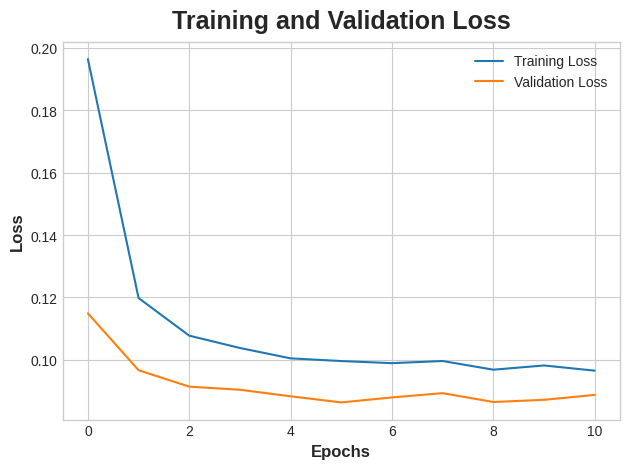

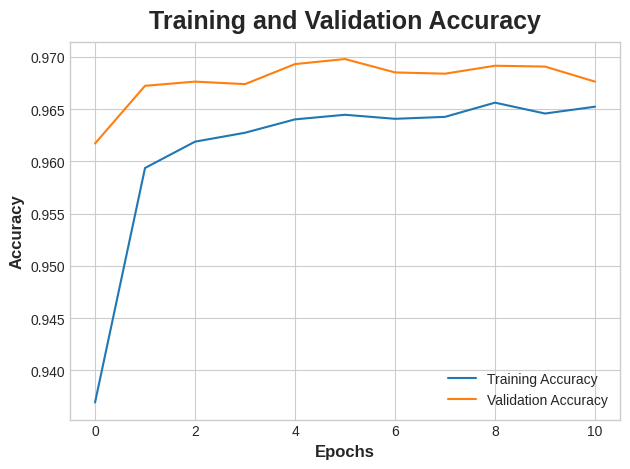

In [9]:
#Early stopping to the training process to avoid overfitting
early_stopping = keras.callbacks.EarlyStopping(
    patience=5,
    min_delta=0.01,
    restore_best_weights=True,
)
#Fit the model
history = model.fit(
    X_train, y_train,
    validation_data=(X_valid, y_valid),
    batch_size=128,
    epochs=200,
    callbacks=[early_stopping],
)

history_df = pd.DataFrame(history.history)
history_df = pd.DataFrame(history.history)

# Plot the loss
plt.plot(history_df['loss'], label='Training Loss')
plt.plot(history_df['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()
plt.show()

# Plot the accuracy
plt.plot(history_df['binary_accuracy'], label='Training Accuracy')
plt.plot(history_df['val_binary_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()
plt.show()

### Final Results:

#### A deep learning model was successfully created to predict given diabetes cases. The model has the below performance.

#### Binary Accuracy : 96.52%
#### Validation Accuracy: 96.76%
#### Binary Losses : 0.0965
#### Validation Losses : 0.0887